In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

from featuring.functions import describedf, StringAnalyzer, WebSiteListAnalyser

### Load the data frame

In [2]:
df=pd.read_csv("data\\urls.csv")

In [3]:
describedf(df,1)

shape is nrow:8654 and ncol:1 

                      url
0             10times.com
1    194.214.100.224:8090
2  1951.polytechnique.org
3              1sthcc.com
4      1xtechnologies.com 

type of col:url is:object 



### Featuring

In [4]:
wl = WebSiteListAnalyser(weblist=df.url.values)
df_feat=wl.featuring()
df_words=wl.wordslist()

C:\Users\xavier\Documents\Prosper\usefulfunctions\functions.py:32: UserWarning: extension is not available for IP
  warnings.warn('extension is not available for IP')


In [5]:
describedf(df_feat,5)
describedf(df_words,1)

shape is nrow:8654 and ncol:5 

   is_ip  nword extension  ndot bothnumsandwords
0  False      2       com     1             True
1   True      5      None     3            False
2  False      3       org     2            False
3  False      2       com     1             True
4  False      2       com     1             True 

type of col:is_ip is:object 

type of col:nword is:int8 

type of col:extension is:object 

type of col:ndot is:int8 

type of col:bothnumsandwords is:object 

shape is nrow:8654 and ncol:1 

                list_of_words
0              [10times, com]
1  [194, 214, 100, 224, 8090]
2  [1951, polytechnique, org]
3               [1sthcc, com]
4       [1xtechnologies, com] 

type of col:list_of_words is:object 



### Plotting

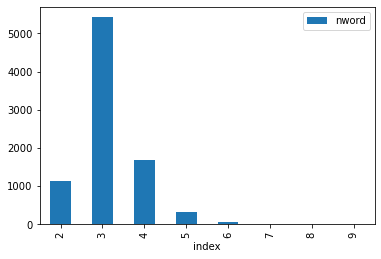

In [46]:
df_feat.nword.value_counts().reset_index().sort_values(['index']).set_index(['index']).plot.bar()
plt.show()

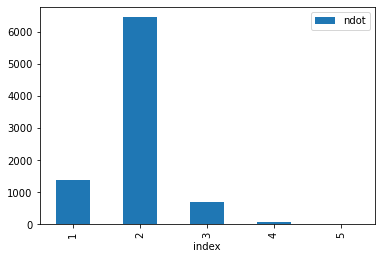

In [48]:
df_feat['ndot'].value_counts().reset_index().sort_values(['index']).set_index(['index']).plot.bar()
plt.show()

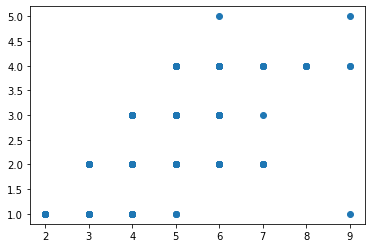

In [33]:
plt.scatter(df_feat['nword'].values,df_feat['ndot'].values)
plt.show()

In [12]:
df_feat['extension'].value_counts()

com              4503
fr               2155
org               572
net               225
ca                201
uk                159
be                 92
ch                 89
eu                 68
au                 61
info               41
io                 33
in                 33
de                 31
za                 19
ma                 18
co                 16
lu                 16
nz                 13
int                12
tn                 12
us                 11
jp                 11
ie                 10
cn                  9
ai                  9
it                  9
biz                 8
nc                  7
me                  6
                 ... 
id                  1
pm                  1
lv                  1
ml                  1
gd                  1
su                  1
gf                  1
aero                1
sh                  1
sandvik             1
je                  1
uno                 1
ro                  1
one                 1
site      

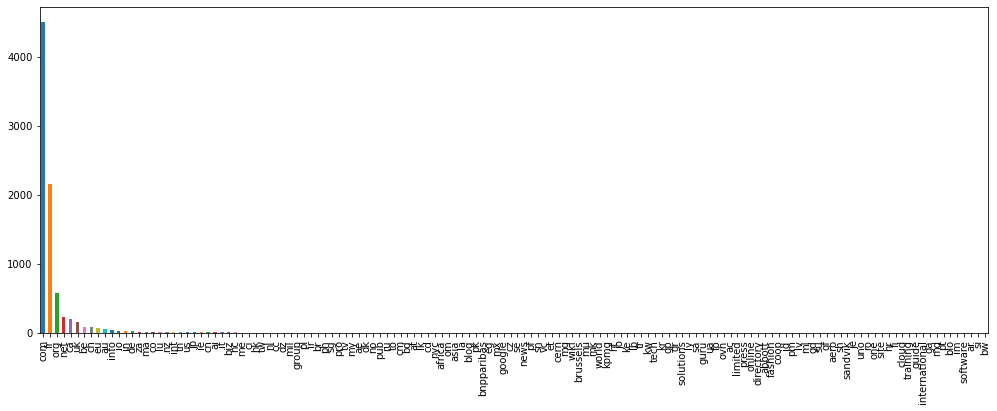

In [11]:
plt.figure(figsize=(17, 6))
df_feat['extension'].value_counts().plot.bar()
plt.show()

In [7]:
df_feat['is_ip'].value_counts()

False    8653
True        1
Name: is_ip, dtype: int64

In [8]:
df_feat['bothnumsandwords'].value_counts()

False    8321
True      333
Name: bothnumsandwords, dtype: int64

# Wiki List
___

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

from featuring.functions import describedf, StringAnalyzer, WebSiteListAnalyser

In [34]:
df=pd.read_csv("data\\prop_wiki.csv")
describedf(df,4)

shape is nrow:8654 and ncol:4 

                      url            label wiki_link  siren_number
0             amatrol.com  Not Interesting       NaN           NaN
1         antsolutions.eu              New       NaN           NaN
2  ardel.reifenhauser.com              New       NaN           NaN
3           bio-sonix.com              New       NaN           NaN
4       blog.datumbox.com  Not Interesting       NaN           NaN 

type of col:url is:object 

type of col:label is:object 

type of col:wiki_link is:object 

type of col:siren_number is:float64 



# Compute features on wiki list csv

In [35]:
wl = WebSiteListAnalyser(weblist=df.url.values)
wl.remove_all_www()
df_feat=wl.featuring()

removing www.


In [61]:
# concat features df withraw df
df_concat=pd.concat([df, df_feat], axis=1)

In [63]:
df_concat['label'].value_counts()

New                8625
Not Interesting      23
Interesting           6
Name: label, dtype: int64

In [62]:
df_concat.loc[df_concat.wiki_link.isnull(),'wiki']=0
df_concat.loc[~df_concat.wiki_link.isnull(),'wiki']=1

In [38]:
describedf(df_concat, df_concat.shape[1])

shape is nrow:8654 and ncol:10 

                      url            label wiki_link  siren_number  is_ip  \
0             amatrol.com  Not Interesting       NaN           NaN  False   
1         antsolutions.eu              New       NaN           NaN  False   
2  ardel.reifenhauser.com              New       NaN           NaN  False   
3           bio-sonix.com              New       NaN           NaN  False   
4       blog.datumbox.com  Not Interesting       NaN           NaN  False   

   nword extension  ndot bothnumsandwords  wiki  
0      2       com     1            False   0.0  
1      2        eu     1            False   0.0  
2      3       com     2            False   0.0  
3      3       com     1            False   0.0  
4      3       com     2            False   0.0   

type of col:url is:object 

type of col:label is:object 

type of col:wiki_link is:object 

type of col:siren_number is:float64 

type of col:is_ip is:object 

type of col:nword is:int8 

type of col:ex

##  Difference in dot number between wiki & no wiki

In [50]:
pd.crosstab(df_concat.wiki,df_concat.ndot, normalize=False)

ndot,1,2,3,4
wiki,,,,
0.0,5953,1950,282,23
1.0,417,28,1,0


In [49]:
pd.crosstab(df_concat.wiki,df_concat.ndot, normalize='index')

ndot,1,2,3,4
wiki,,,,
0.0,0.725268,0.237573,0.034357,0.002802
1.0,0.934978,0.062780,0.002242,0.000000


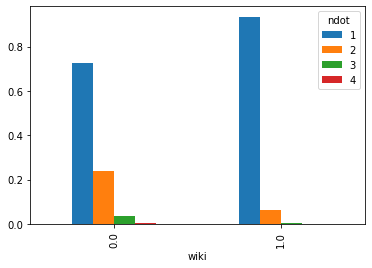

In [60]:
pd.crosstab(df_concat.wiki,df_concat.ndot, normalize='index').plot.bar()
plt.show()

##  Difference in word number between wiki & no wiki

In [51]:
pd.crosstab(df_concat.wiki,df_concat.nword, normalize=False)

nword,2,3,4,5,6,7,8,9
wiki,,,,,,,,
0.0,4798,2582,628,155,32,7,5,1
1.0,382,59,5,0,0,0,0,0


In [52]:
pd.crosstab(df_concat.wiki,df_concat.nword, normalize='index')

nword,2,3,4,5,6,7,8,9
wiki,,,,,,,,
0.0,0.584552,0.314571,0.076511,0.018884,0.003899,0.000853,0.000609,0.000122
1.0,0.856502,0.132287,0.011211,0.000000,0.000000,0.000000,0.000000,0.000000


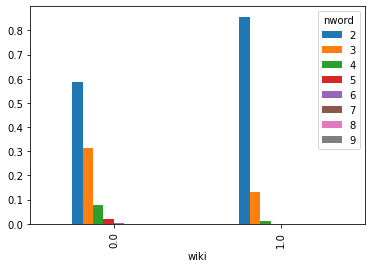

In [59]:
pd.crosstab(df_concat.wiki,df_concat.nword, normalize='index').plot.bar()
plt.show()

##  Difference in number of word with both char and num between wiki & no wiki

In [54]:
pd.crosstab(df_concat.wiki,df_concat.bothnumsandwords, normalize=False)

bothnumsandwords,False,True
wiki,,
0.0,7880,328
1.0,441,5


In [56]:
pd.crosstab(df_concat.wiki,df_concat.bothnumsandwords, normalize='index')

bothnumsandwords,False,True
wiki,,
0.0,0.960039,0.039961
1.0,0.988789,0.011211


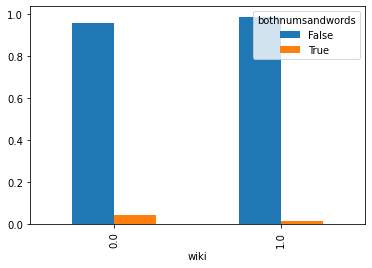

In [58]:
pd.crosstab(df_concat.wiki,df_concat.bothnumsandwords, normalize='index').plot.bar()
plt.show()

## Extension, ndot, wiki

In [81]:
# df_concat[['wiki','extension']].groupby(['wiki','extension']).agg(np.size)

In [80]:
# df_concat[['wiki','extension']].groupby(['extension']).filter(lambda x: len(x) < 3)

In [79]:
df_concat[['wiki','extension']].groupby(['wiki','extension']).agg(np.size)[df_concat[['wiki','extension']].groupby(['wiki','extension']).agg(np.size)<10]

wiki  extension 
0.0   abbott        2
      ac            2
      ae            8
      aero          2
      africa        4
      ar            2
      asia          4
      at            4
      bd            4
      bio           2
      blog          4
      bnpparibas    2
      br            8
      brussels      2
      bw            2
      cd            4
      cern          2
      cloud         2
      cm            4
      coop          2
      cz            4
      directory     2
      dk            6
      eg            4
      et            2
      fashion       2
      fi            2
      fo            2
      ga            2
      gd            2
                   ..
      sn            4
      software      2
      solutions     2
      su            2
      tech          2
      to            6
      tr            2
      training      2
      tv            8
      ua            2
      uno           2
      vc            2
      wiki          2
      world    

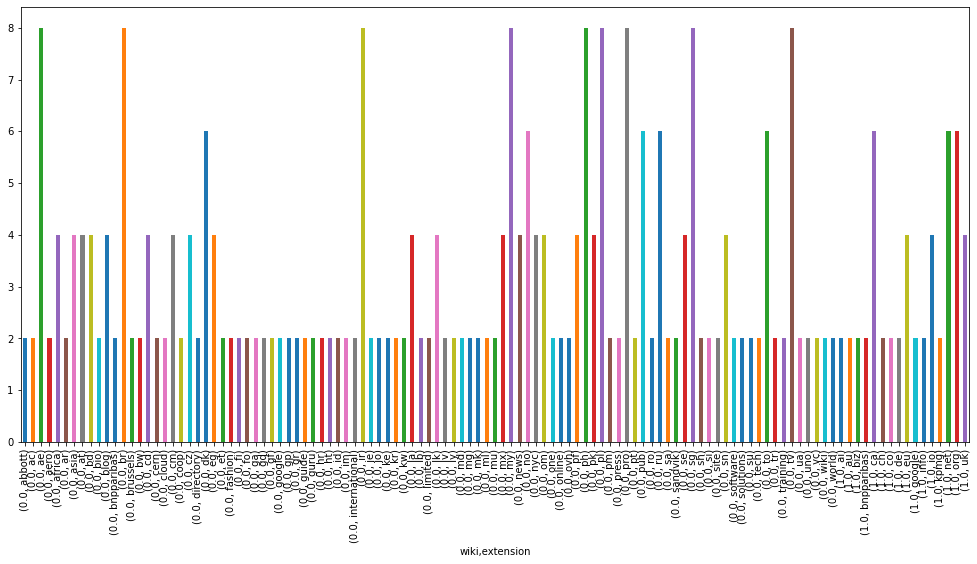

In [83]:
plt.figure(figsize=(17,8))
df_concat[['wiki','extension']].groupby(['wiki','extension']).agg(np.size)[df_concat[['wiki','extension']].groupby(['wiki','extension']).agg(np.size)<10].plot.bar()
plt.show()